cuda
938
Epoch: 1 |train loss: 2.164 
Epoch: 1 |test loss: 1.533 |accuracy: 62 %
Epoch: 1 |train loss: 0.627 
Epoch: 1 |test loss: 0.369 |accuracy: 93 %
Epoch: 1 |train loss: 0.323 
Epoch: 1 |test loss: 0.205 |accuracy: 93 %


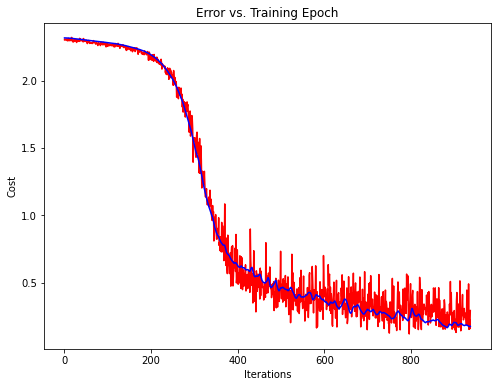

In [15]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
# 1 prepare dataset

batch_size = 64

# ToTensor  转换图片为张量
# Normalized an tensor image with mean and standard deviation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
train_dataset = datasets.MNIST(root='./data/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='./data/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 2 design model

model = nn.Sequential(
    # 卷积1操作
    # input: channel=1, out_channel=10, kernel_size5*5;
    # output: h*w=(28-5+0+1)/1*(28-5+0+1)/1=24*24
    nn.Conv2d(1, 10, kernel_size=5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    # 卷积2操作 接收池化后的conv1 input(h*w)=h*w/2=24/2=12
    # input: channel=10, out_channel=20, kernel_size5*5;
    # output: h*w=(12-5+0+1)/1*(12-5+0+1)/1=8*8
    nn.Conv2d(10, 20, kernel_size=5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.Flatten(),
    # 全连接 接收池化后的conv2 input(h*w)=h*w/2=8/2=4
    # input: 展开后为20*(4*4)=320
    # output: 10 手写字10个分类
    nn.Linear(320, 100),
    nn.Linear(100, 50),
    nn.Linear(50, 10),
    )


model.to(device)

# 3 交叉熵损失函数 优化器
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)


optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)

# 4 training cycle forward, backward, update
def train(epoch, train_cost, test_cost, mo):
    running_loss = 0.0
    for step, data in enumerate(train_loader, 0):
        mo.train()
        inputs, target = data
        inputs = inputs.to(device)
        target = target.to(device)
        optimizer.zero_grad()

        outputs = mo(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        train_cost[step] = loss.item()

        test_losses = 0
        mo.eval()
        correct = 0
        total = 0
        # print(step)
        with torch.no_grad():
            for s, l_data in enumerate(test_loader, 0):
                images, labels = l_data
                images = images.to(device)
                labels = labels.to(device)
                l_outputs = mo(images)
                test_loss = criterion(l_outputs, labels)
                test_losses = test_loss.item()
                _, predicted = torch.max(l_outputs.data, dim=1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                break
            test_cost[step] = test_losses
        if step % 300 == 299:
            print('Epoch: %d |train loss: %.3f ' % (epoch + 1, running_loss/300))
            print('Epoch: %d |test loss: %.3f |accuracy: %d %%' % (epoch + 1, test_losses, 100 * correct / total))
            running_loss = 0.0
    return train_cost




def show(cost, test):
    fig, bx = plt.subplots(figsize=(8, 6))
    bx.plot(np.arange(len(cost)), cost, 'r', label='train_loss')
    bx.plot(np.arange(len(test)), test, 'b', label='test_loss')

    bx.set_xlabel('Iterations')
    bx.set_ylabel('Cost')
    bx.set_title('Error vs. Training Epoch')
    plt.show()


def jn_cnn(mo, e):
    length = len(train_loader) * e
    print(length)
    train_cost_all = []
    test_cost_all = []
    for epoch in range(e):
        train_cost = [0 for i in range(len(train_loader))]
        test_cost = [0 for i in range(len(train_loader))]

        train_cost = train(epoch, train_cost, test_cost, mo)

        train_cost_all = train_cost_all + train_cost
        test_cost_all = test_cost_all + test_cost

    show(np.array(train_cost_all), np.array(test_cost_all))


jn_cnn(model, 1)


cuda
2814
Epoch: 1 |train loss: 2.078 
Epoch: 1 |test loss: 1.341 |accuracy: 84 %
Epoch: 1 |train loss: 1.200 
Epoch: 1 |test loss: 0.634 |accuracy: 89 %
Epoch: 1 |train loss: 0.848 
Epoch: 1 |test loss: 0.411 |accuracy: 95 %
Epoch: 2 |train loss: 0.691 
Epoch: 2 |test loss: 0.267 |accuracy: 96 %
Epoch: 2 |train loss: 0.597 
Epoch: 2 |test loss: 0.212 |accuracy: 98 %
Epoch: 2 |train loss: 0.554 
Epoch: 2 |test loss: 0.179 |accuracy: 96 %
Epoch: 3 |train loss: 0.502 
Epoch: 3 |test loss: 0.152 |accuracy: 100 %
Epoch: 3 |train loss: 0.480 
Epoch: 3 |test loss: 0.127 |accuracy: 100 %
Epoch: 3 |train loss: 0.457 
Epoch: 3 |test loss: 0.123 |accuracy: 98 %


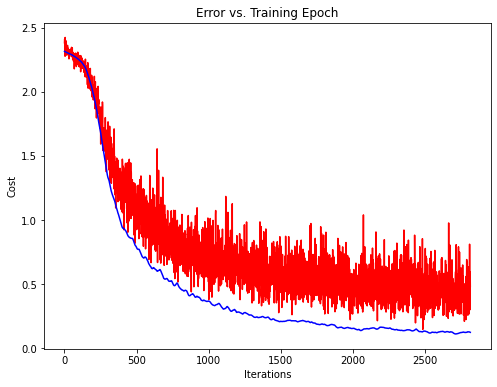

In [17]:
print(device)

model = nn.Sequential(
    # 卷积1操作
    # input: channel=1, out_channel=10, kernel_size5*5;
    # output: h*w=(28-5+0+1)/1*(28-5+0+1)/1=24*24
    nn.Conv2d(1, 10, kernel_size=5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    # 卷积2操作 接收池化后的conv1 input(h*w)=h*w/2=24/2=12
    # input: channel=10, out_channel=20, kernel_size5*5;
    # output: h*w=(12-5+0+1)/1*(12-5+0+1)/1=8*8
    nn.Conv2d(10, 20, kernel_size=5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Flatten(),
    # 全连接 接收池化后的conv2 input(h*w)=h*w/2=8/2=4
    # input: 展开后为20*(4*4)=320
    # output: 10 手写字10个分类
    nn.Linear(320, 100),
    nn.Linear(100, 50),
    nn.Linear(50, 10),
)
model.to(device)
# 3 交叉熵损失函数 优化器
# 3 交叉熵损失函数 优化器
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)


optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)

jn_cnn(model,3)

